In [ ]:
from data_ingestion.pipeline_manager import PipelineRunner as PipelineRunner 
from data_ingestion import utilities as util
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
%pip install -r requirements.txt

In [ ]:
path = "Messungen"
pipeline = None
origin = "SensorLogger"

runner = PipelineRunner(path)
runner.set_origin(origin)
runner.set_pipeline(pipeline)
data = runner.run()
path: pathlib.Path = "Export.arrow"
data.write_ipc(path)


In [ ]:
# get all user value in data_from_run
data

### Read saved Data

In [ ]:
# read Export.arrow
import polars as pl
data = pl.read_ipc(path)

In [ ]:
df = data
df.describe()

## Functions Visualize

In [ ]:
# create 3 subplots for each accelerometer axis
def plot_accelerometer_data(data, multipleplots=True, alpha=0.5):
    '''
    plot accelerometer data
    data: polars dataframe
    multipleplots: if True, create 3 subplots for each axis
    alpha: transparency of the lineplot
    
    returns: Seaborn lineplot
    '''
    if multipleplots==True:
        fig, axs = plt.subplots(3, 1, figsize=(10, 10))
        sns.lineplot(data=data, x="time", y="Accelerometer_x", ax=axs[0], color="red", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Accelerometer_y", ax=axs[1], color="green", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Accelerometer_z", ax=axs[2], color="blue", alpha=alpha)
        fig.suptitle("acceleration over time")
        fig.tight_layout()
        plt.show()
    else:
        fig, axs = plt.subplots(1, 1, figsize=(10, 10))
        sns.lineplot(data=data, x="time", y="Accelerometer_x", color="red", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Accelerometer_y", color="green", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Accelerometer_z", color="blue", alpha=alpha)
        axs.set_xlabel("time")
        axs.set_ylabel("acceleration")
        axs.set_title("acceleration over time")
        plt.show()

In [ ]:
# create 3 subplots for each Gyroscope axis
def plot_gyroscope_data(data, multipleplots=True, alpha=0.5):
    '''
    plot accelerometer data
    data: polars dataframe
    multipleplots: if True, create 3 subplots for each axis
    alpha: transparency of the lineplot
    
    returns: Seaborn lineplot
    '''
    if multipleplots==True:
        fig, axs = plt.subplots(3, 1, figsize=(10, 10))
        sns.lineplot(data=data, x="time", y="Gyroscope_x", ax=axs[0], color="red", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Gyroscope_y", ax=axs[1], color="green", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Gyroscope_z", ax=axs[2], color="blue", alpha=alpha)
        fig.suptitle("Gyroscope over time")
        fig.tight_layout()
        plt.show()
    else:
        fig, axs = plt.subplots(1, 1, figsize=(10, 10))
        sns.lineplot(data=data, x="time", y="Gyroscope_x", color="red", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Gyroscope_y", color="green", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Gyroscope_z", color="blue", alpha=alpha)
        axs.set_xlabel("time")
        axs.set_ylabel("Gyroscope")
        axs.set_title("Gyroscope over time")
        plt.show()

In [19]:
# create 3 subplots for each Gyroscope axis
def plot_magnetometer_data(data, multipleplots=True, alpha=0.5):
    '''
    plot Magnetometer data
    data: polars dataframe
    multipleplots: if True, create 3 subplots for each axis
    alpha: transparency of the lineplot
    
    returns: Seaborn lineplot
    '''
    if multipleplots==True:
        fig, axs = plt.subplots(3, 1, figsize=(10, 10))
        sns.lineplot(data=data, x="time", y="Magnetometer_x", ax=axs[0], color="red", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Magnetometer_y", ax=axs[1], color="green", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Magnetometer_z", ax=axs[2], color="blue", alpha=alpha)
        fig.suptitle("Magnetometer over time")
        fig.tight_layout()
        plt.show()
    else:
        fig, axs = plt.subplots(1, 1, figsize=(10, 10))
        sns.lineplot(data=data, x="time", y="Magnetometer_x", color="red", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Magnetometer_y", color="green", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Magnetometer_z", color="blue", alpha=alpha)
        axs.set_xlabel("time")
        axs.set_ylabel("Magnetometer")
        axs.set_title("Magnetometer over time")
        plt.show()



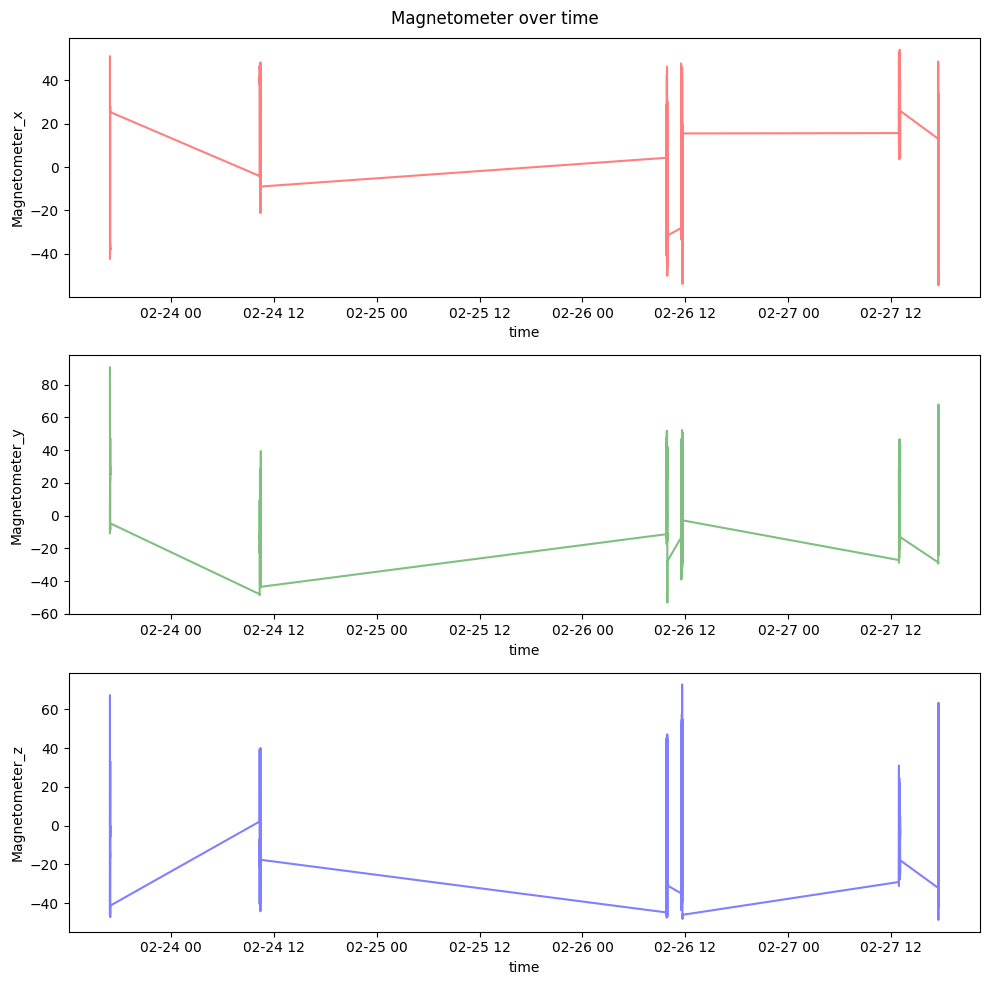

In [20]:
# filter data
vis_data = data.filter(pl.col("user") == "Etienne_Roulet")

plot_magnetometer_data(vis_data, multipleplots=True, alpha = 0.5)

In [ ]:
vis_data = data.filter(pl.col("user") == "Etienne_Roulet")

plot_accelerometer_data(vis_data, multipleplots=True, alpha = 0.5)

KeyboardInterrupt: 

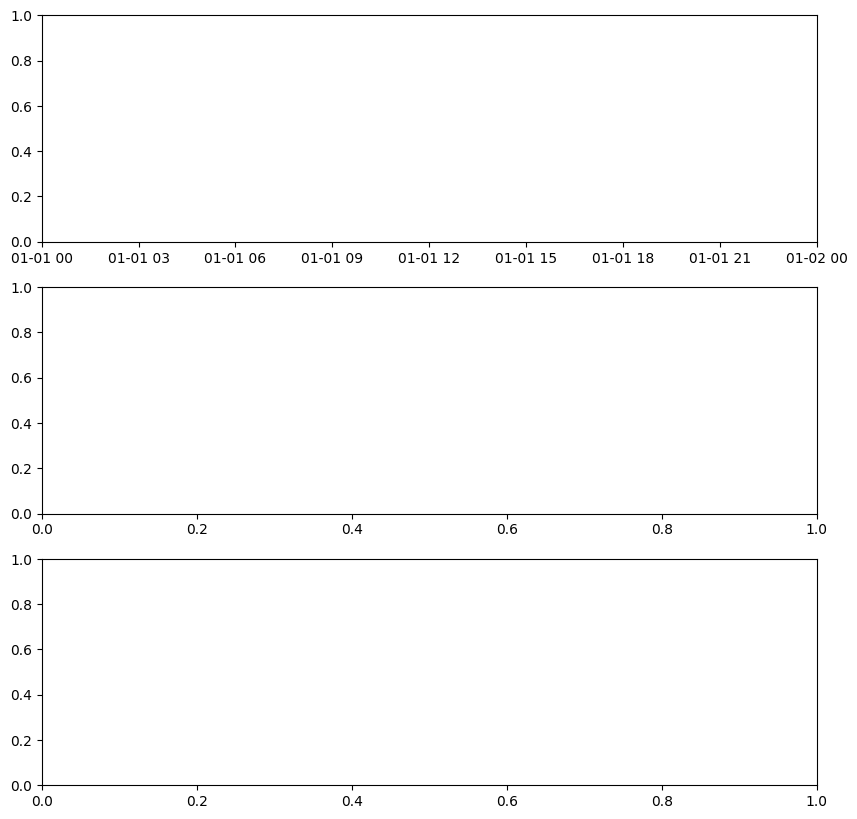

In [21]:
vis_data = data.filter(pl.col("user") == "Etienne_Roulet")

plot_gyroscope_data(vis_data, multipleplots=True, alpha = 0.5)

### How many Rows have each user?

In [16]:

df = data
users = data['user'].unique()
activity = data['class'].unique()
# Loop over each user and filter the dataframe by that user
for user in users:
    for act in activity:
        user_df = df.filter(pl.col("user") == user)
        user_df = user_df.filter(pl.col("class") == act)
        # Do something with the filtered dataframe for each user
        # For example, print the number of rows in the filtered dataframe
        print(f"{user} {act}: {len(user_df)} rows")

Ben_Tran Velofahren: 2278 rows
Ben_Tran Sitzen: 5140 rows
Ben_Tran Stehen: 0 rows
Ben_Tran Treppenlaufen: 1370 rows
Ben_Tran Laufen: 16 rows
Etienne_Roulet Velofahren: 68383 rows
Etienne_Roulet Sitzen: 75351 rows
Etienne_Roulet Stehen: 12323 rows
Etienne_Roulet Treppenlaufen: 15556 rows
Etienne_Roulet Laufen: 0 rows
Gabriel_Torres Velofahren: 0 rows
Gabriel_Torres Sitzen: 11818 rows
Gabriel_Torres Stehen: 0 rows
Gabriel_Torres Treppenlaufen: 90299 rows
Gabriel_Torres Laufen: 67874 rows
Lea_Buetler Velofahren: 0 rows
Lea_Buetler Sitzen: 1226 rows
Lea_Buetler Stehen: 0 rows
Lea_Buetler Treppenlaufen: 0 rows
Lea_Buetler Laufen: 0 rows
Tobias_Buess Velofahren: 0 rows
Tobias_Buess Sitzen: 6387 rows
Tobias_Buess Stehen: 2885 rows
Tobias_Buess Treppenlaufen: 4825 rows
Tobias_Buess Laufen: 6045 rows


## Data Cleaning

### ...

## Convert to Tensorflow Datasets

### Users and Activity

In [ ]:
A = util.State.to_numpy([
    util.State(util.User.ETIENNE, util.Activity.SITZEN),
    util.State(util.User.BEN, util.Activity.STEHEN),
    util.State(util.User.LEA, util.Activity.LAUFEN),
    util.State(util.User.FLORIN, util.Activity.RENNEN),
    util.State(util.User.GABRIEL, util.Activity.FAHRRAD),
    util.State(util.User.MANJAVY, util.Activity.TREPPENGEHEN),
    util.State(util.User.OGNJEN, util.Activity.SITZEN),
    util.State(util.User.TOBIAS, util.Activity.STEHEN),
    util.State(util.User.WEIPING, util.Activity.LAUFEN),  
 ], batch=True)

tf.convert_to_tensor(A)